# Introduction
This notebook aims to evaluate the performance and predictive power of a model that has been
trained and tested on data collected from homes in suburbs of Boston, Massachusetts.  
This dataset, originating from the UCI Machine Learning Repository, provides information on features such as the average number of rooms per dwelling ('RM'), the percentage of lower-class homeowners in the neighborhood ('LSTAT'), and the student-to-teacher ratio in nearby schools ('PTRATIO'). These features are essential in understanding the housing market dynamics of the area.

### Problem Statement
The goal of this project is to construct a predictive model capable of estimating the monetary value ('MEDV') of houses based on the quantitative information provided by the features 'RM', 'LSTAT', and 'PTRATIO'.  
By leveraging machine learning techniques, the aim is to develop a model that accurately predicts house prices, thereby providing valuable insights for real estate agents and stakeholders in the housing market.  
Through rigorous evaluation and comparison of different regression models, the goal is to identify the most effective approach for predicting house prices.

### Loading the Dataset

In [4]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score


In [18]:
# Load the dataset
housing_data = pd.read_csv('/content/housing (1).csv')

# Display the first few rows of the dataset
housing_data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
# Check the shape of the DataFrame
housing_data.shape

(489, 4)

In [7]:
# Checking the descriptive statistics summary
housing_data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


### Data Preprocessing

In [8]:
# Check for missing values
housing_data.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

### Data Visualization

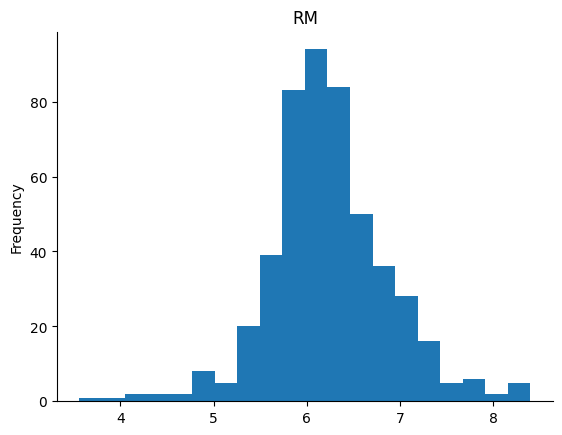

In [9]:
# Visualizing the distribution of 'RM'

housing_data['RM'].plot(kind='hist', bins=20, title='RM')
plt.gca().spines[['top', 'right',]].set_visible(False)

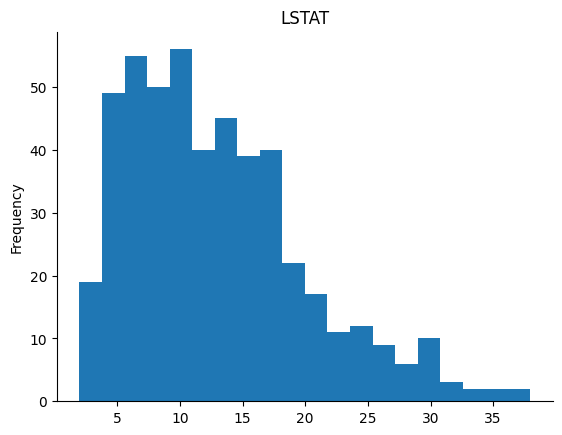

In [10]:
# Visualizing the distribution of 'LSTAT'

housing_data['LSTAT'].plot(kind='hist', bins=20, title='LSTAT')
plt.gca().spines[['top', 'right',]].set_visible(False)

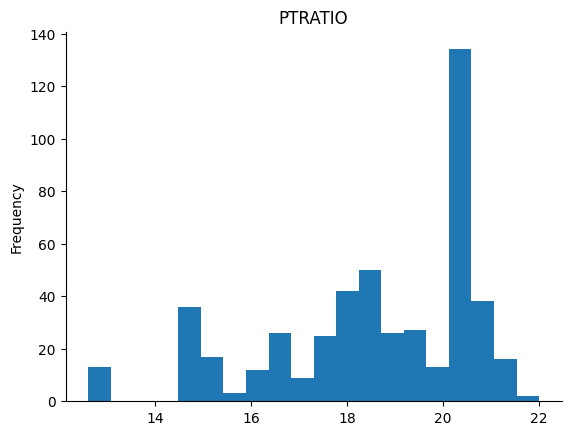

In [11]:
# Visualizing the distribution of 'PTRATIO'

housing_data['PTRATIO'].plot(kind='hist', bins=20, title='PTRATIO')
plt.gca().spines[['top', 'right',]].set_visible(False)

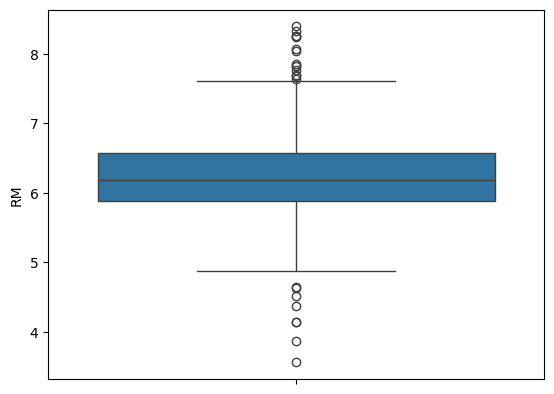

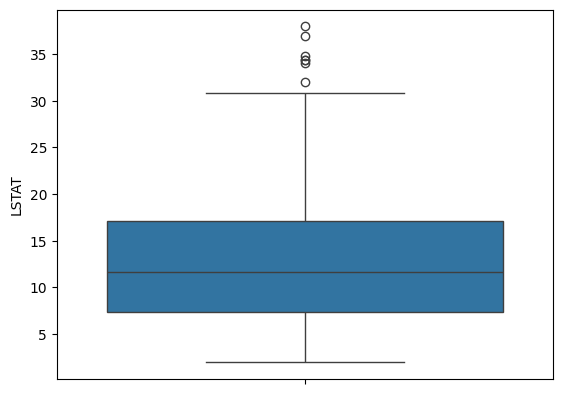

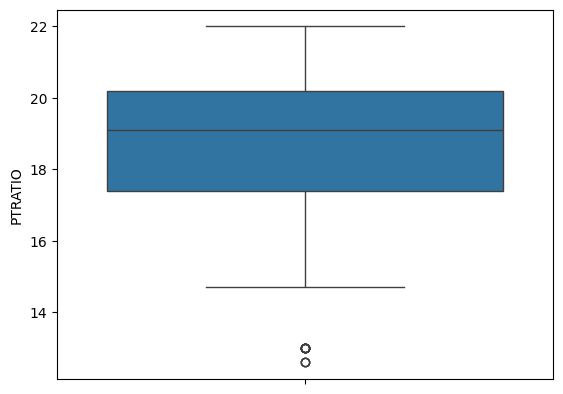

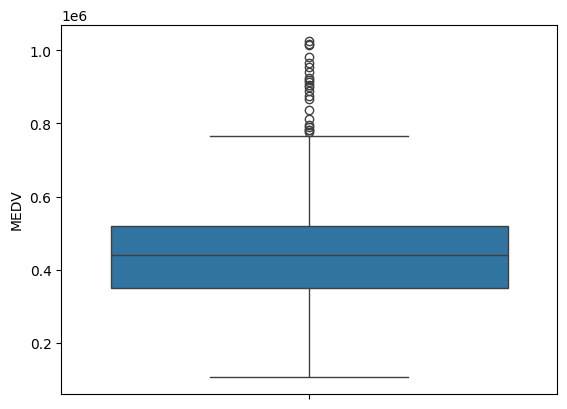

In [12]:
# Check for outliers in the dataset columns

for col in housing_data:
    sns.boxplot(housing_data[col])
    plt.show()


In [13]:
# Check for outliers in the MEDV column using the interquartile range (IQR) method

#Q1 = np.percentile(housing_data['RM'], 25, interpolation = 'midpoint')
#Q3 = np.percentile(housing_data['RM'], 75, interpolation = 'midpoint')
#IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

### Training the Machine Learning Models and Model(s) Evaluation

In [14]:
# Split the data into features (X) and target variable (y)
X = housing_data[['RM', 'LSTAT', 'PTRATIO']]
y = housing_data['MEDV']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [17]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)

    print(f"{name} Metrics:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")
    print(f"R-squared: {r2}")
    print(f"Explained Variance Score: {explained_var}")
    print("-----------------------------")

Linear Regression Metrics:
MSE: 6789025559.265892
RMSE: 82395.54332162566
MAE: 64277.28865670341
MAPE: 0.1805023982690325
R-squared: 0.691093400309851
Explained Variance Score: 0.7038194351887497
-----------------------------
Random Forest Metrics:
MSE: 3245169433.5
RMSE: 56966.38862961211
MAE: 43862.78571428572
MAPE: 0.12737670592201164
R-squared: 0.8523419529990267
Explained Variance Score: 0.8584454889595008
-----------------------------
Gradient Boosting Metrics:
MSE: 3359779588.840745
RMSE: 57963.60572670359
MAE: 44874.62086737271
MAPE: 0.12997149816961823
R-squared: 0.8471270907088194
Explained Variance Score: 0.8532853009458992
-----------------------------


# Summary
1. Linear Regression:

  * Mean Squared Error (MSE): 6789025559.27
  * Root Mean Squared Error (RMSE): 82395.54
  * Mean Absolute Error (MAE): 64277.29
  * Mean Absolute Percentage Error (MAPE): 0.18 (18%)
  * R-squared: 0.6911
  * Explained Variance Score: 0.7038

- Interpretation:

  The Linear Regression model has a relatively high MSE, indicating a large average squared difference between predicted and actual values.  
  The RMSE of approximately 82395.54 suggests that, on average, predictions are off by around 82395.  
  The MAE of approximately 64277.29 implies that, on average, predictions are off by approximately 64277.29.  
  The MAPE of 18% suggests that, on average, predictions have an absolute percentage error of 18%.  
  The R-squared value of 0.6911 indicates that around 69.11% of the variance in the target variable is explained by the model.
  The Explained Variance Score of 0.7038 further indicates that the model explains about 70.38% of the variance in the target variable.

2. Random Forest:

  * MSE: 3245169433.5
  * RMSE: 56966.39
  * MAE: 43862.79
  * MAPE: 0.13 (13%)
  * R-squared: 0.8523
  * Explained Variance Score: 0.8584

- Interpretation:

  The Random Forest model outperforms Linear Regression with a significantly lower MSE, RMSE, MAE, and MAPE.  
  The R-squared value of 0.8523 indicates that around 85.23% of the variance in the target variable is explained by the model.  
  The Explained Variance Score of 0.8584 further confirms the model's ability to explain approximately 85.84% of the variance.

3. Gradient Boosting:

  * MSE: 3359779588.84
  * RMSE: 57963.61
  * MAE: 44874.62
  * MAPE: 0.13 (13%)
  * R-squared: 0.8471
  * Explained Variance Score: 0.8533
- Interpretation:

  The Gradient Boosting model has similar performance to Random Forest, with slightly higher MSE, RMSE, MAE, and MAPE.  
  The R-squared value of 0.8471 indicates that around 84.71% of the variance in the target variable is explained by the model.  
 The Explained Variance Score of 0.8533 further confirms the model's ability to explain approximately 85.33% of the variance.  

In summary, both Random Forest and Gradient Boosting models outperform the Linear Regression model in terms of predictive accuracy, as evidenced by their lower MSE, RMSE, MAE, MAPE, higher R-squared, and Explained Variance Score. Among the two, Random Forest appears to perform slightly better.